In [2]:
import pandas as pd

# long data 만들기

- 각 변수는 하나의 컬럼에 배치
- 각 관측치는 한행에 1건씩 분리되어 배치
- 각 값은 개별 셀에 배치

- melt()
- pivot()
- pivot_table()

In [6]:
pd.read_csv(r'C:\Users\Admin\hipython\data\pew.csv')
df = pd.read_csv(r'C:\Users\Admin\hipython\data\pew.csv')
type(df)

pandas.core.frame.DataFrame

In [34]:
df

,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k,$75-100k,$100-150k,>150k,Don't know/refused
0,Agnostic,27,34,60,81,76,137,122,109,84,96
1,Atheist,12,27,37,52,35,70,73,59,74,76
2,Buddhist,27,21,30,34,33,58,62,39,53,54
3,Catholic,418,617,732,670,638,1116,949,792,633,1489
4,Don’t know/refused,15,14,15,11,10,35,21,17,18,116
5,Evangelical Prot,575,869,1064,982,881,1486,949,723,414,1529
6,Hindu,1,9,7,9,11,34,47,48,54,37
7,Historically Black Prot,228,244,236,238,197,223,131,81,78,339
8,Jehovah's Witness,20,27,24,24,21,30,15,11,6,37
9,Jewish,19,19,25,25,30,95,69,87,151,162


In [22]:
df.columns

Index(['religion', '<$10k', '$10-20k', '$20-30k', '$30-40k', '$40-50k',
       '$50-75k', '$75-100k', '$100-150k', '>150k', 'Don't know/refused'],
      dtype='object')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   religion            18 non-null     object
 1   <$10k               18 non-null     int64 
 2   $10-20k             18 non-null     int64 
 3   $20-30k             18 non-null     int64 
 4   $30-40k             18 non-null     int64 
 5   $40-50k             18 non-null     int64 
 6   $50-75k             18 non-null     int64 
 7   $75-100k            18 non-null     int64 
 8   $100-150k           18 non-null     int64 
 9   >150k               18 non-null     int64 
 10  Don't know/refused  18 non-null     int64 
dtypes: int64(10), object(1)
memory usage: 1.7+ KB


In [25]:
df.head(2)

,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k,$75-100k,$100-150k,>150k,Don't know/refused
0,Agnostic,27,34,60,81,76,137,122,109,84,96
1,Atheist,12,27,37,52,35,70,73,59,74,76


In [26]:
df.melt(id_vars=['religion']).sort_values('religion').head(18)

,religion,variable,value
0,Agnostic,<$10k,27
144,Agnostic,>150k,84
162,Agnostic,Don't know/refused,96
126,Agnostic,$100-150k,109
36,Agnostic,$20-30k,60
108,Agnostic,$75-100k,122
18,Agnostic,$10-20k,34
90,Agnostic,$50-75k,137
72,Agnostic,$40-50k,76
54,Agnostic,$30-40k,81


In [27]:
df_melt = df.melt(id_vars='religion')
df_melt

,religion,variable,value
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Don’t know/refused,<$10k,15
...,...,...,...
175,Orthodox,Don't know/refused,73
176,Other Christian,Don't know/refused,18
177,Other Faiths,Don't know/refused,71
178,Other World Religions,Don't know/refused,8


In [127]:
df_melt['religion']

0                   Agnostic
1                    Atheist
2                   Buddhist
3                   Catholic
4         Don’t know/refused
               ...          
175                 Orthodox
176          Other Christian
177             Other Faiths
178    Other World Religions
179             Unaffiliated
Name: religion, Length: 180, dtype: object

In [35]:
cond = df_melt['religion'] == 'Agnostic'

In [36]:
cond

0       True
1      False
2      False
3      False
4      False
       ...  
175    False
176    False
177    False
178    False
179    False
Name: religion, Length: 180, dtype: bool

In [30]:
df_melt.loc[cond]

,religion,variable,value
0,Agnostic,<$10k,27
18,Agnostic,$10-20k,34
36,Agnostic,$20-30k,60
54,Agnostic,$30-40k,81
72,Agnostic,$40-50k,76
90,Agnostic,$50-75k,137
108,Agnostic,$75-100k,122
126,Agnostic,$100-150k,109
144,Agnostic,>150k,84
162,Agnostic,Don't know/refused,96


In [31]:
df_melt_rename = df_melt.rename(columns={ 'variable':'income'  , 'value':'count'   })

In [32]:

df_melt_rename

,religion,income,count
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Don’t know/refused,<$10k,15
...,...,...,...
175,Orthodox,Don't know/refused,73
176,Other Christian,Don't know/refused,18
177,Other Faiths,Don't know/refused,71
178,Other World Religions,Don't know/refused,8


In [37]:
df_melt_new = df.melt(id_vars='religion', var_name= 'income', value_name='count')
df_melt_new

,religion,income,count
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Don’t know/refused,<$10k,15
...,...,...,...
175,Orthodox,Don't know/refused,73
176,Other Christian,Don't know/refused,18
177,Other Faiths,Don't know/refused,71
178,Other World Religions,Don't know/refused,8


In [129]:
df_pivot = df_melt_new.pivot(index='religion', columns='income', values='count').reset_index()   # long data -> wide data

df_pivot

income,religion,$10-20k,$100-150k,$20-30k,$30-40k,$40-50k,$50-75k,$75-100k,<$10k,>150k,Don't know/refused
0,Agnostic,34,109,60,81,76,137,122,27,84,96
1,Atheist,27,59,37,52,35,70,73,12,74,76
2,Buddhist,21,39,30,34,33,58,62,27,53,54
3,Catholic,617,792,732,670,638,1116,949,418,633,1489
4,Don’t know/refused,14,17,15,11,10,35,21,15,18,116
5,Evangelical Prot,869,723,1064,982,881,1486,949,575,414,1529
6,Hindu,9,48,7,9,11,34,47,1,54,37
7,Historically Black Prot,244,81,236,238,197,223,131,228,78,339
8,Jehovah's Witness,27,11,24,24,21,30,15,20,6,37
9,Jewish,19,87,25,25,30,95,69,19,151,162


## long data연습

In [6]:
pd.read_csv(r'C:\Users\Admin\hipython\data\billboard.csv')
billboard_df = pd.read_csv(r'C:\Users\Admin\hipython\data\billboard.csv')


In [7]:
billboard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317 entries, 0 to 316
Data columns (total 81 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          317 non-null    int64  
 1   artist        317 non-null    object 
 2   track         317 non-null    object 
 3   time          317 non-null    object 
 4   date.entered  317 non-null    object 
 5   wk1           317 non-null    int64  
 6   wk2           312 non-null    float64
 7   wk3           307 non-null    float64
 8   wk4           300 non-null    float64
 9   wk5           292 non-null    float64
 10  wk6           280 non-null    float64
 11  wk7           269 non-null    float64
 12  wk8           260 non-null    float64
 13  wk9           253 non-null    float64
 14  wk10          244 non-null    float64
 15  wk11          236 non-null    float64
 16  wk12          222 non-null    float64
 17  wk13          210 non-null    float64
 18  wk14          204 non-null    

In [8]:
billboard_df.head(2)

,year,artist,track,time,date.entered,wk1,wk2,wk3,wk4,wk5,...,wk67,wk68,wk69,wk70,wk71,wk72,wk73,wk74,wk75,wk76
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,87,82.0,72.0,77.0,87.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,91,87.0,92.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
billboard_df.columns

Index(['year', 'artist', 'track', 'time', 'date.entered', 'wk1', 'wk2', 'wk3',
       'wk4', 'wk5', 'wk6', 'wk7', 'wk8', 'wk9', 'wk10', 'wk11', 'wk12',
       'wk13', 'wk14', 'wk15', 'wk16', 'wk17', 'wk18', 'wk19', 'wk20', 'wk21',
       'wk22', 'wk23', 'wk24', 'wk25', 'wk26', 'wk27', 'wk28', 'wk29', 'wk30',
       'wk31', 'wk32', 'wk33', 'wk34', 'wk35', 'wk36', 'wk37', 'wk38', 'wk39',
       'wk40', 'wk41', 'wk42', 'wk43', 'wk44', 'wk45', 'wk46', 'wk47', 'wk48',
       'wk49', 'wk50', 'wk51', 'wk52', 'wk53', 'wk54', 'wk55', 'wk56', 'wk57',
       'wk58', 'wk59', 'wk60', 'wk61', 'wk62', 'wk63', 'wk64', 'wk65', 'wk66',
       'wk67', 'wk68', 'wk69', 'wk70', 'wk71', 'wk72', 'wk73', 'wk74', 'wk75',
       'wk76'],
      dtype='object')

In [10]:
id_vars = billboard_df.columns[:5].tolist()
id_vars

['year', 'artist', 'track', 'time', 'date.entered']

In [11]:
b_df_melt = billboard_df.melt(id_vars=id_vars, var_name='week', value_name='rank')
b_df_melt

,year,artist,track,time,date.entered,week,rank
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk1,87.0
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,wk1,91.0
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,wk1,81.0
3,2000,3 Doors Down,Loser,4:24,2000-10-21,wk1,76.0
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,wk1,57.0
...,...,...,...,...,...,...,...
24087,2000,Yankee Grey,Another Nine Minutes,3:10,2000-04-29,wk76,NaN
24088,2000,"Yearwood, Trisha",Real Live Woman,3:55,2000-04-01,wk76,NaN
24089,2000,Ying Yang Twins,Whistle While You Tw...,4:19,2000-03-18,wk76,NaN
24090,2000,Zombie Nation,Kernkraft 400,3:30,2000-09-02,wk76,NaN


# apply()

In [47]:
df = pd.DataFrame({ 'a':[10, 20, 30], 'b':[20, 30, 40]}) 
df

,a,b
0,10,20
1,20,30
2,30,40


In [48]:
df**2

,a,b
0,100,400
1,400,900
2,900,1600


In [49]:
df/10

,a,b
0,1.0,2.0
1,2.0,3.0
2,3.0,4.0


In [55]:
def make_sq(x, e=2):
    return x**e

In [56]:
df.apply(make_sq, e=3)

,a,b
0,1000,8000
1,8000,27000
2,27000,64000


In [68]:
# 직원 명단 DataFrame 생성
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva'],
    'Age': [25, 45, 35, 32, 28],
    'Salary': [5000, 7000, 6500, 5500, 6000]
}
sel_df = pd.DataFrame(data)
sel_df

,Name,Age,Salary
0,Alice,25,5000
1,Bob,45,7000
2,Charlie,35,6500
3,David,32,5500
4,Eva,28,6000


In [69]:
def age_category(age):
    if age < 30:
        return '20대'
    elif 30 <= age < 40:
        return '30대'
    else:
        return '40대'

In [71]:
sel_df['Age_Category'] = sel_df['Age'].apply(age_category)
sel_df

,Name,Age,Salary,Age_Category
0,Alice,25,5000,20대
1,Bob,45,7000,40대
2,Charlie,35,6500,30대
3,David,32,5500,30대
4,Eva,28,6000,20대


In [81]:
def bonus_calc(salary, rate=0.2):
        return salary * rate

In [83]:
sel_df['Bonus'] = sel_df['Salary'].apply(bonus_calc, rate=0.3)
sel_df

,Name,Age,Salary,Age_Category,Bonus
0,Alice,25,5000,20대,1500.0
1,Bob,45,7000,40대,2100.0
2,Charlie,35,6500,30대,1950.0
3,David,32,5500,30대,1650.0
4,Eva,28,6000,20대,1800.0


In [77]:
sel_df['Bonus'] = sel_df['Salary'].apply(lambda salary: salary * 0.2)
sel_df

,Name,Age,Salary,Age_Category,Bonus
0,Alice,25,5000,20대,1000.0
1,Bob,45,7000,40대,1400.0
2,Charlie,35,6500,30대,1300.0
3,David,32,5500,30대,1100.0
4,Eva,28,6000,20대,1200.0


# 데이터 병합

In [3]:
df_1 = pd.read_csv(r'C:\Users\Admin\hipython\data\concat_1.csv')
df_2 = pd.read_csv(r'C:\Users\Admin\hipython\data\concat_2.csv')
df_3 = pd.read_csv(r'C:\Users\Admin\hipython\data\concat_3.csv')
df_1, df_2,df_3

(    A   B   C   D
 0  a0  b0  c0  d0
 1  a1  b1  c1  d1
 2  a2  b2  c2  d2
 3  a3  b3  c3  d3,
     A   B   C   D
 0  a4  b4  c4  d4
 1  a5  b5  c5  d5
 2  a6  b6  c6  d6
 3  a7  b7  c7  d7,
      A    B    C    D
 0   a8   b8   c8   d8
 1   a9   b9   c9   d9
 2  a10  b10  c10  d10
 3  a11  b11  c11  d11)

In [4]:
total_df =pd.concat([df_1, df_2, df_3],ignore_index=True)
total_df.loc[3]
total_df

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3
4,a4,b4,c4,d4
5,a5,b5,c5,d5
6,a6,b6,c6,d6
7,a7,b7,c7,d7
8,a8,b8,c8,d8
9,a9,b9,c9,d9


In [12]:
total_df.iloc[3]
total_df.reset_index()

,index,A,B,C,D
0,0,a0,b0,c0,d0
1,1,a1,b1,c1,d1
2,2,a2,b2,c2,d2
3,3,a3,b3,c3,d3
4,4,a4,b4,c4,d4
5,5,a5,b5,c5,d5
6,6,a6,b6,c6,d6
7,7,a7,b7,c7,d7
8,8,a8,b8,c8,d8
9,9,a9,b9,c9,d9


# 새로운 행 추가

In [1]:
import pandas as pd

In [2]:
add_ser = pd.Series(['a100', 'b200', 'c300','d100'])
add_ser

0    a100
1    b200
2    c300
3    d100
dtype: object

In [ ]:
# total_df_add = pd.concat([total_df, add_ser])
# total_df_add

In [5]:
col_list = total_df.columns.to_list()
col_list

['A', 'B', 'C', 'D']

In [7]:

# dataframe으로 만든다.
empty_df = pd.DataFrame( columns = col_list)
# empty_df[0] = add_ser
empty_df

,A,B,C,D


In [8]:
add_ser.index = empty_df.columns
add_ser

A    a100
B    b200
C    c300
D    d100
dtype: object

In [9]:
empty_df.loc[0] = add_ser
empty_df

,A,B,C,D
0,a100,b200,c300,d100


In [10]:
new_total_df = pd.concat([total_df,empty_df ], ignore_index=True)
new_total_df

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3
4,a4,b4,c4,d4
5,a5,b5,c5,d5
6,a6,b6,c6,d6
7,a7,b7,c7,d7
8,a8,b8,c8,d8
9,a9,b9,c9,d9


# 시리즈를 행으로 만들어서 concat

- 원본과 동일한 칼럼을 갖는 빈데이터프레임 생성
- 컬럼이름 = 인덱스이름 시리즈 생성
- 빈데이터프레임에 행으로 시리즈를 추가
- concat(원본, 빈데이터프레임)

In [1]:
import pandas as pd

In [2]:
pd.read_csv(r'C:\Users\Admin\hipython\data\CARD_SUBWAY_MONTH_202102.csv')

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
20210201,중앙선,용문,1282,1259,20210204,NaN
20210201,중앙선,지평,48,43,20210204,NaN
20210201,중앙선,아신,415,413,20210204,NaN
20210201,중앙선,양수,1463,1466,20210204,NaN
20210201,중앙선,운길산,495,463,20210204,NaN
...,...,...,...,...,...,...
20210228,중앙선,오빈,216,236,20210303,NaN
20210228,중앙선,양평,3299,3187,20210303,NaN
20210228,중앙선,원덕,322,304,20210303,NaN
20210228,중앙선,용문,1899,1716,20210303,NaN


In [8]:
import pandas as pd
import matplotlib.pyplot as plt

cols = ["사용일자","노선명","역명","승차총승객수","하차총승객수","등록일자"]
df = pd.read_csv(
    r'C:\Users\Admin\hipython\data\CARD_SUBWAY_MONTH_202102.csv',
    names=cols,
    header=0,
    usecols=range(6))


df



,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
0,20210201,중앙선,용문,1282,1259,20210204
1,20210201,중앙선,지평,48,43,20210204
2,20210201,중앙선,아신,415,413,20210204
3,20210201,중앙선,양수,1463,1466,20210204
4,20210201,중앙선,운길산,495,463,20210204
...,...,...,...,...,...,...
16746,20210228,중앙선,오빈,216,236,20210303
16747,20210228,중앙선,양평,3299,3187,20210303
16748,20210228,중앙선,원덕,322,304,20210303
16749,20210228,중앙선,용문,1899,1716,20210303


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16751 entries, 0 to 16750
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   사용일자    16751 non-null  int64 
 1   노선명     16751 non-null  object
 2   역명      16751 non-null  object
 3   승차총승객수  16751 non-null  int64 
 4   하차총승객수  16751 non-null  int64 
 5   등록일자    16751 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 785.3+ KB


In [9]:
df["노선명"].unique()

array(['중앙선', '장항선', '일산선', '우이신설선', '안산선', '수인선', '분당선', '과천선',
       '공항철도 1호선', '경춘선', '경인선', '경의선', '경원선', '경부선', '경강선', '9호선2~3단계',
       '9호선', '8호선', '7호선', '6호선', '5호선', '4호선', '3호선', '2호선', '1호선'],
      dtype=object)

In [5]:
df["노선명"].value_counts()

노선명
5호선         1484
7호선         1428
2호선         1400
경부선         1092
6호선         1051
분당선          967
3호선          937
경원선          821
경의선          737
4호선          728
9호선          700
중앙선          588
경인선          560
경춘선          532
수인선          504
8호선          476
공항철도 1호선     392
안산선          364
9호선2~3단계     364
우이신설선        364
경강선          308
일산선          282
1호선          280
과천선          224
장항선          168
Name: count, dtype: int64

In [12]:
# df["노선명"].value_counts()
df.groupby("노선명").size().reset_index()

,노선명,0
0,1호선,280
1,2호선,1400
2,3호선,937
3,4호선,728
4,5호선,1484
5,6호선,1051
6,7호선,1428
7,8호선,476
8,9호선,700
9,9호선2~3단계,364


In [8]:
line_size_df = df.groupby("노선명").size().to_frame("size")
line_size_df


,size
노선명,
1호선,280
2호선,1400
3호선,937
4호선,728
5호선,1484
6호선,1051
7호선,1428
8호선,476
9호선,700


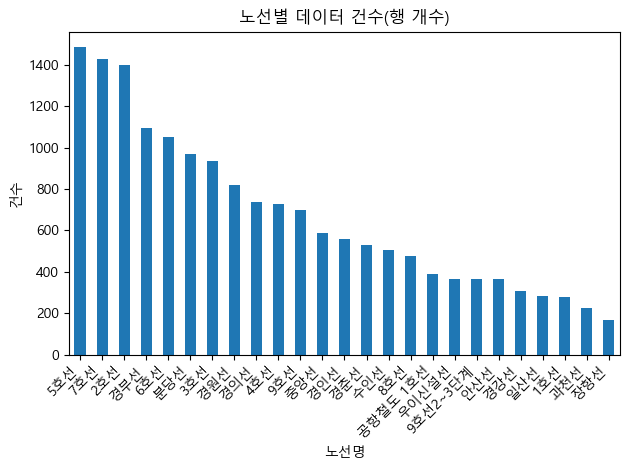

In [ ]:
plt.rcParams["font.family"] = "Malgun Gothic"
plt.rcParams["axes.unicode_minus"] = False  # 마이너스(-) 기호 깨짐 방지


line_size = df.groupby("노선명").size().sort_values(ascending=False)

plt.figure()
line_size.plot(kind="bar")
plt.title("노선별 데이터 건수(행 개수)")
plt.xlabel("노선명")
plt.ylabel("건수")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


In [10]:
import matplotlib.pyplot as plt



# 5호선만 필터링
df_5 = df[df["노선명"] == "5호선"].copy()

# 승하차승객수 컬럼 생성
df_5["승하차승객수"] = df_5["승차총승객수"] + df_5["하차총승객수"]

# 역별 합계(전체 기간 합)
station_flow = df_5.groupby("역명")[["승차총승객수", "하차총승객수"]].sum().reset_index() # barh는 오름차순이 보기 좋음

station_flow


,역명,승차총승객수,하차총승객수
0,강동,417865,393081
1,개롱,137130,143689
2,개화산,114266,110775
3,거여,170214,163019
4,고덕,190570,189102
5,공덕,296871,314855
6,광나루(장신대),282257,259111
7,광화문(세종문화회관),630350,640269
8,군자(능동),242935,266776
9,굽은다리(강동구민회관앞),206037,195306


In [11]:
# 승차
top10_board_승차 = (
    df_5.groupby("역명")["승차총승객수"]
       .sum()
       .sort_values(ascending=False)
       .head(10)
       .reset_index()
)

top10_board_승차

# 하차
top10_board_하차 = (
    df_5.groupby("역명")["하차총승객수"]
       .sum()
       .sort_values(ascending=False)
       .head(10)
       .reset_index()
)

top10_board_하차


,역명,하차총승객수
0,광화문(세종문화회관),640269
1,까치산,622602
2,화곡,580939
3,여의도,576983
4,오목교(목동운동장앞),533946
5,발산,413888
6,천호(풍납토성),409844
7,목동,397331
8,강동,393081
9,장한평,383986


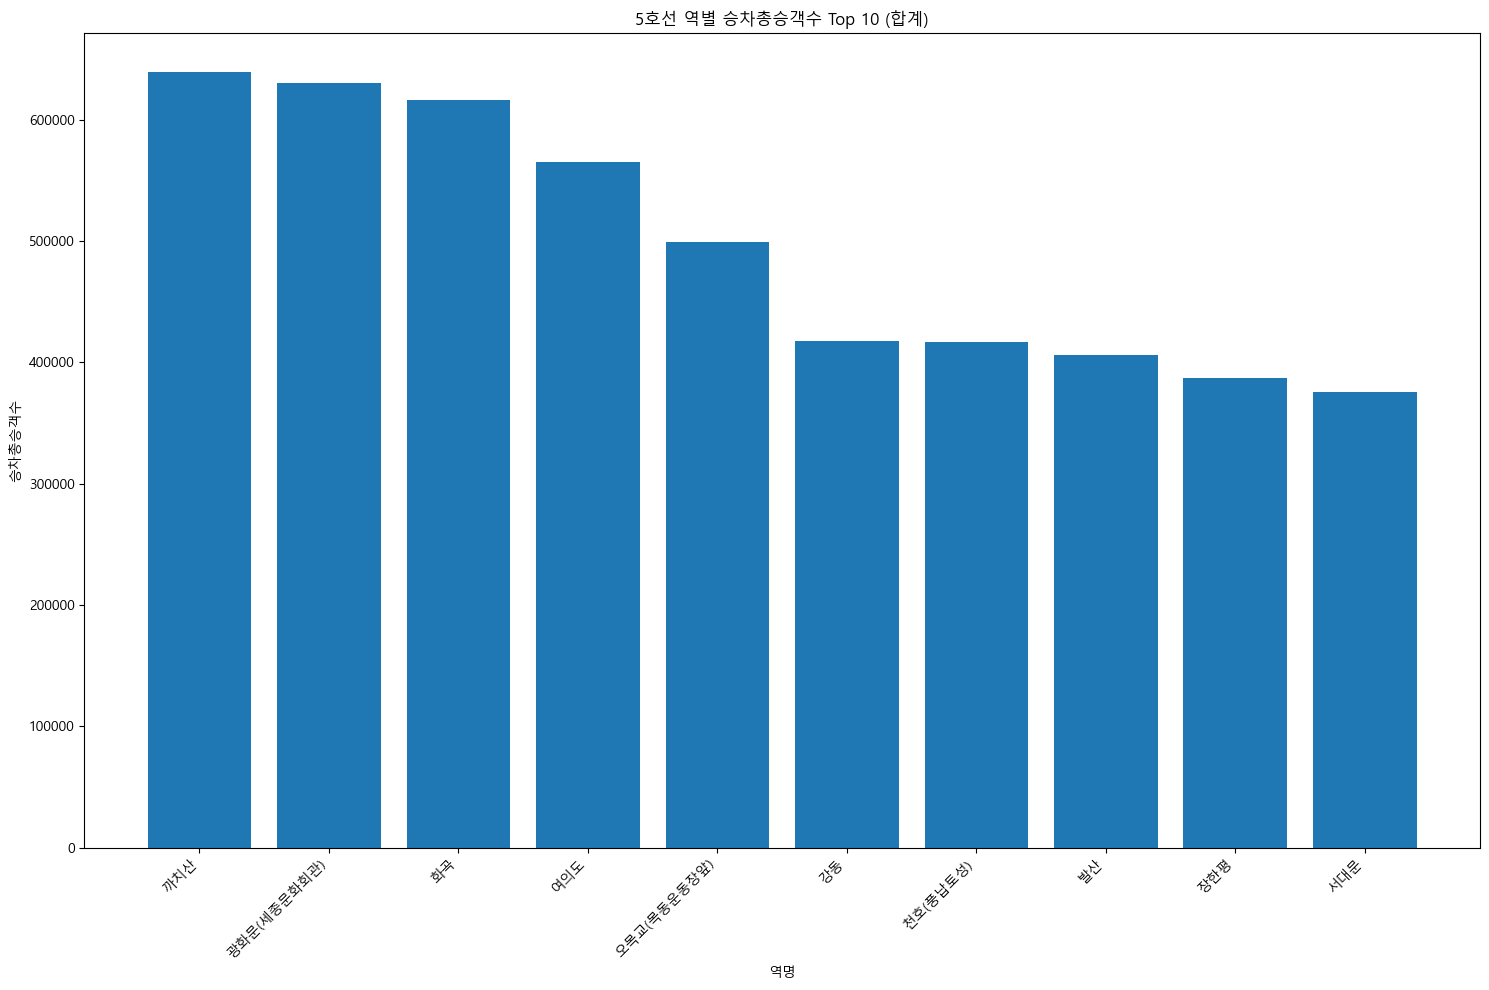

In [ ]:
plt.rcParams["font.family"] = "Malgun Gothic"
plt.rcParams["axes.unicode_minus"] = False  # 마이너스(-) 기호 깨짐 방지



plt.figure(figsize=(15, 10))
plt.bar(top10_board_승차["역명"], top10_board_승차["승차총승객수"])
plt.title("5호선 역별 승차총승객수 Top 10 (합계)")
plt.xlabel("역명")
plt.ylabel("승차총승객수")
plt.xticks(rotation=45, ha="right")  # 역명 겹침 방지
plt.tight_layout()
plt.show()


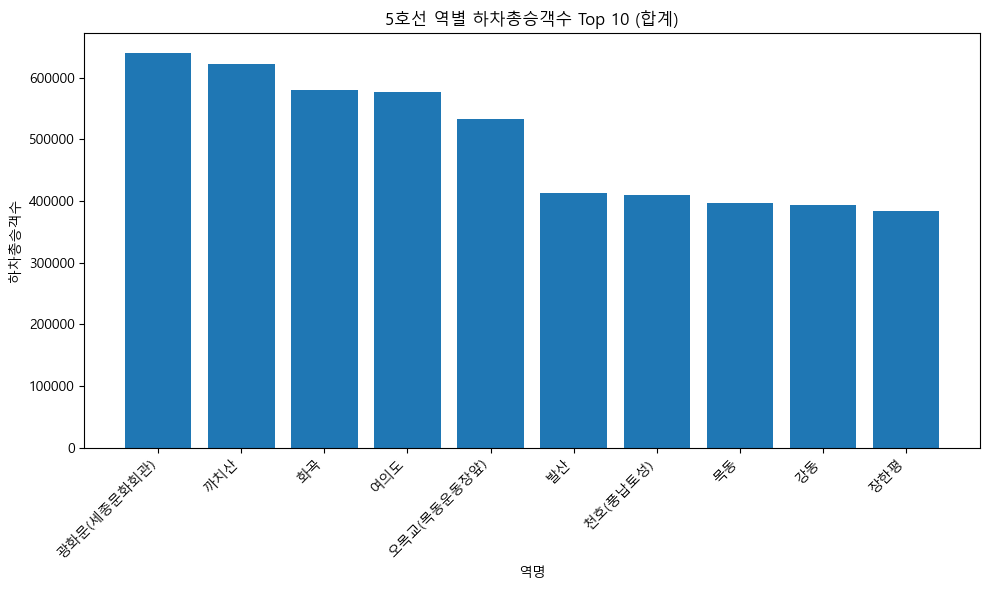

In [ ]:
plt.rcParams["font.family"] = "Malgun Gothic"
plt.rcParams["axes.unicode_minus"] = False  # 마이너스(-) 기호 깨짐 방지



plt.figure(figsize=(10, 6))
plt.bar(top10_board_하차["역명"], top10_board_하차["하차총승객수"])
plt.title("5호선 역별 하차총승객수 Top 10 (합계)")
plt.xlabel("역명")
plt.ylabel("하차총승객수")
plt.xticks(rotation=45, ha="right")  # 역명 겹침 방지
plt.tight_layout()
plt.show()

In [17]:
# 2호선만 필터링
df_2 = df[df["노선명"] == "2호선"].copy()

# 승하차승객수 컬럼 생성
df_2["승하차승객수"] = df_2["승차총승객수"] + df_2["하차총승객수"]

# 역별 합계(전체 기간 합)
station_flow = df_2.groupby("역명")[["승차총승객수", "하차총승객수"]].sum().reset_index() # barh는 오름차순이 보기 좋음

station_flow


,역명,승차총승객수,하차총승객수
0,강남,1830710,1782108
1,강변(동서울터미널),695308,689779
2,건대입구,757296,798583
3,교대(법원.검찰청),690275,769708
4,구로디지털단지,1285603,1287537
5,구의(광진구청),509864,507242
6,낙성대(강감찬),597804,580323
7,당산,393876,449450
8,대림(구로구청),546016,560634
9,도림천,30287,30993


In [1]:
import pandas as pd
import matplotlib.pyplot as plt


cols = ["사용일자","노선명","역명","승차총승객수","하차총승객수","등록일자"]
df_new = pd.read_csv(
    r'C:\Users\Admin\hipython\data\CARD_SUBWAY_MONTH_202102.csv',
    names=cols,
    header=0,
    usecols=range(6))




In [2]:
df_new['사용일자'].head(3)

0    20210201
1    20210201
2    20210201
Name: 사용일자, dtype: int64

In [19]:
df_new["사용일자"] = pd.to_datetime(df_new["사용일자"].astype(str), format="%Y%m%d")
df_new["사용일자"].dtype
df_new[["사용일자"]].head()


,사용일자
0,2021-02-01
1,2021-02-01
2,2021-02-01
3,2021-02-01
4,2021-02-01


In [20]:
df_new

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
0,2021-02-01,중앙선,용문,1282,1259,20210204
1,2021-02-01,중앙선,지평,48,43,20210204
2,2021-02-01,중앙선,아신,415,413,20210204
3,2021-02-01,중앙선,양수,1463,1466,20210204
4,2021-02-01,중앙선,운길산,495,463,20210204
...,...,...,...,...,...,...
16746,2021-02-28,중앙선,오빈,216,236,20210303
16747,2021-02-28,중앙선,양평,3299,3187,20210303
16748,2021-02-28,중앙선,원덕,322,304,20210303
16749,2021-02-28,중앙선,용문,1899,1716,20210303


In [5]:
def to_date_yyyymmdd(x):
    # x가 int/str 어떤 형태든 'YYYYMMDD' 문자열로 만든 뒤 datetime으로 변환
    s = str(int(x))  # 20210201 같은 값 처리 (혹시 '20210201.0' 같은 경우도 대비)
    return pd.to_datetime(s, format="%Y%m%d")

df_new["사용일자"] = df_new["사용일자"].apply(to_date_yyyymmdd)


df_new

TypeError: int() argument must be a string, a bytes-like object or a real number, not 'Timestamp'

In [6]:
df_new.drop(columns=["등록일자"], inplace=True)
df_new

,사용일자,노선명,역명,승차총승객수,하차총승객수
0,2021-02-01,중앙선,용문,1282,1259
1,2021-02-01,중앙선,지평,48,43
2,2021-02-01,중앙선,아신,415,413
3,2021-02-01,중앙선,양수,1463,1466
4,2021-02-01,중앙선,운길산,495,463
...,...,...,...,...,...
16746,2021-02-28,중앙선,오빈,216,236
16747,2021-02-28,중앙선,양평,3299,3187
16748,2021-02-28,중앙선,원덕,322,304
16749,2021-02-28,중앙선,용문,1899,1716


In [22]:
df_new["승하차차이"] = (df_new["승차총승객수"] - df_new["하차총승객수"]).abs()
df_new["승하차총승객수"] = df_new["승차총승객수"] + df_new["하차총승객수"]
df_new.head(10)

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자,승하차차이,승하차총승객수
0,2021-02-01,중앙선,용문,1282,1259,20210204,23,2541
1,2021-02-01,중앙선,지평,48,43,20210204,5,91
2,2021-02-01,중앙선,아신,415,413,20210204,2,828
3,2021-02-01,중앙선,양수,1463,1466,20210204,3,2929
4,2021-02-01,중앙선,운길산,495,463,20210204,32,958
5,2021-02-01,중앙선,팔당,687,662,20210204,25,1349
6,2021-02-01,중앙선,도심,2237,1736,20210204,501,3973
7,2021-02-01,중앙선,덕소,5139,5082,20210204,57,10221
8,2021-02-01,중앙선,양정,721,606,20210204,115,1327
9,2021-02-01,중앙선,도농,9067,8349,20210204,718,17416


In [9]:
# 2호선만 필터링
df_2 = df[df["노선명"] == "2호선"].copy()

# 승하차승객수 컬럼 생성
df_2["승하차차이"] = (df_2["승차총승객수"] - df_2["하차총승객수"])
df_2["승하차총승객수"] = df_2["승차총승객수"] + df_2["하차총승객수"]
  
# 역별 합계(전체 기간 합)
station_flow = df_2.groupby("역명")[["승하차차이", "승하차총승객수"]].sum().reset_index() # barh는 오름차순이 보기 좋음

top_10 = station_flow.sort_values("승하차총승객수", ascending=False).head(10)
top_10.head(10)

,역명,승하차차이,승하차총승객수
0,강남,48602,3612818
42,잠실(송파구청),26942,2959718
27,신림,33048,2776742
4,구로디지털단지,-1934,2573140
49,홍대입구,-50248,2540954
26,신도림,25478,2138194
20,선릉,120930,2091430
33,역삼,-83850,2076344
18,서울대입구(관악구청),18565,2075523
16,삼성(무역센터),-3124,2072738


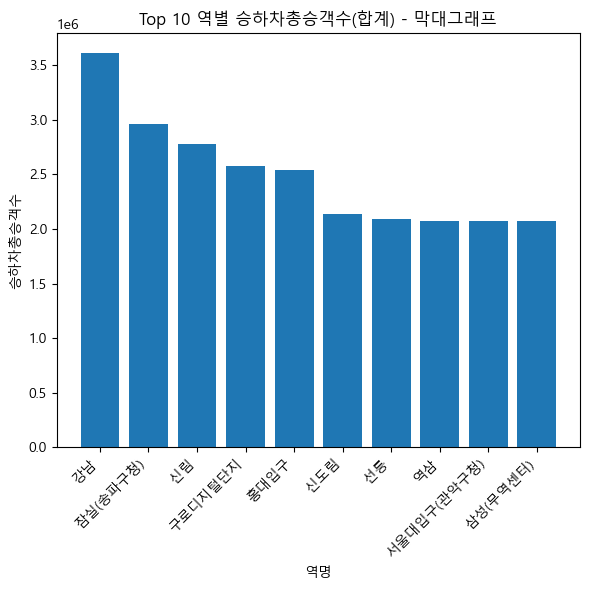

In [10]:
plt.rcParams["font.family"] = "Malgun Gothic"
plt.rcParams["axes.unicode_minus"] = False

# 보기 좋게 정렬(승하차총승객수 큰 순)
top_10_sorted = top_10.sort_values("승하차총승객수", ascending=False).reset_index(drop=True)

# ----------------------------
# 1) 막대 그래프 (Top 10 역별 승하차총승객수)
# ----------------------------
plt.figure(figsize=(6, 6))
plt.bar(top_10_sorted["역명"], top_10_sorted["승하차총승객수"])
plt.title("Top 10 역별 승하차총승객수(합계) - 막대그래프")
plt.xlabel("역명")
plt.ylabel("승하차총승객수")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


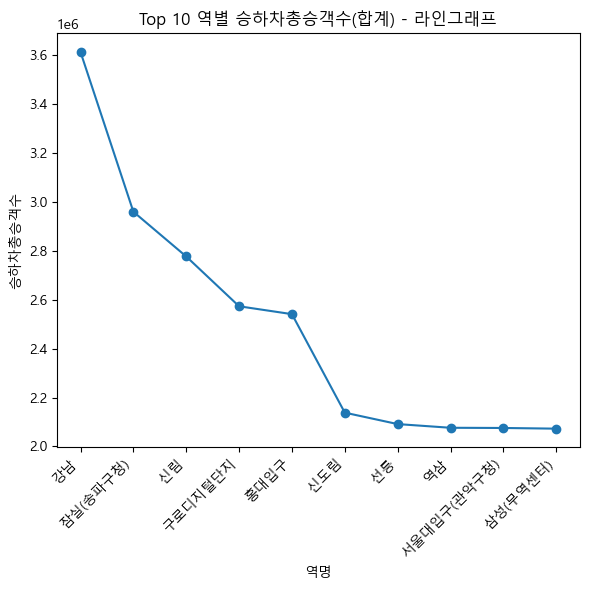

In [38]:
plt.figure(figsize=(6, 6))
plt.plot(top_10_sorted["역명"], top_10_sorted["승하차총승객수"], marker="o")
plt.title("Top 10 역별 승하차총승객수(합계) - 라인그래프")
plt.xlabel("역명")
plt.ylabel("승하차총승객수")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

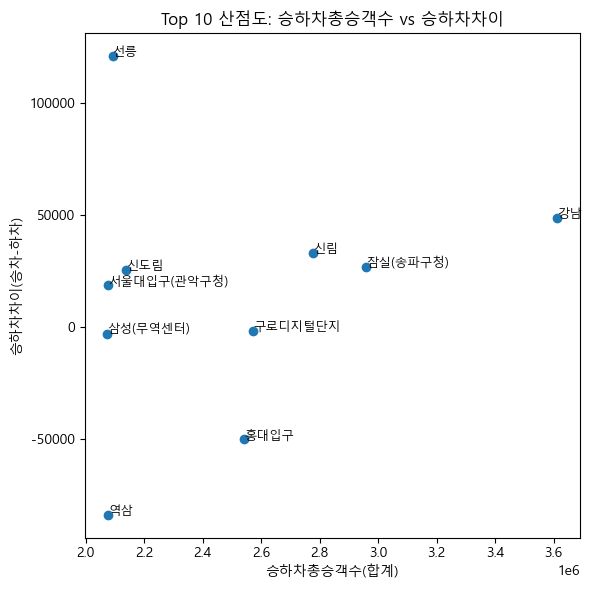

In [12]:
plt.figure(figsize=(6, 6))
plt.scatter(top_10_sorted["승하차총승객수"], top_10_sorted["승하차차이"])
plt.title("Top 10 산점도: 승하차총승객수 vs 승하차차이")
plt.xlabel("승하차총승객수(합계)")
plt.ylabel("승하차차이(승차-하차)")
plt.tight_layout()

for i in range(len(top_10)):
    plt.text(
        top_10["승하차총승객수"].iloc[i],
        top_10["승하차차이"].iloc[i],
        top_10["역명"].iloc[i],
        fontsize=9
    )

plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_11140\2185362160.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


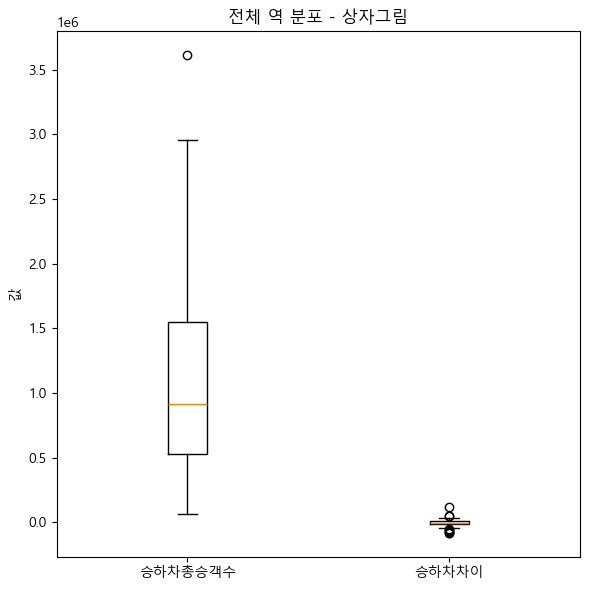

In [41]:
# 4) 상자그림 (전체 역 분포: 승하차총승객수, 승하차차이)
#   - top 10이 아니라 전체 분포를 보는 게 상자그림 목적에 더 맞음
# ----------------------------
plt.figure(figsize=(6, 6))
plt.boxplot(
    [station_flow["승하차총승객수"], station_flow["승하차차이"]],
    labels=["승하차총승객수", "승하차차이"],
    showfliers=True
)
plt.title("전체 역 분포 - 상자그림")
plt.ylabel("값")
plt.tight_layout()
plt.show()

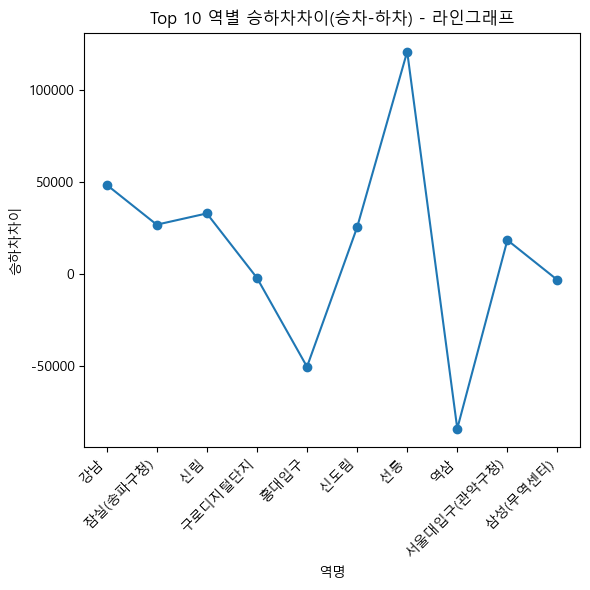

In [42]:
plt.figure(figsize=(6, 6))
plt.plot(top_10_sorted["역명"], top_10_sorted["승하차차이"], marker="o")
plt.title("Top 10 역별 승하차차이(승차-하차) - 라인그래프")
plt.xlabel("역명")
plt.ylabel("승하차차이")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()